# English

In [17]:
!wget --no-clobber https://www.gutenberg.org/cache/epub/74/pg74.txt
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

pattern = r"[a-zA-Z’0-9]+"

File ‘pg74.txt’ already there; not retrieving.



In [18]:
with open('pg74.txt', 'r') as f:
    text = f.read()
    words = re.findall(pattern, text)
    types = set(words)
    ttr = len(words) / len(types)
    print(ttr)

8.647848537005164


5 most common words:  [('the', 3986), ('and', 3191), ('a', 1936), ('to', 1809), ('of', 1589)]
5 most common letters:  [('e', 38099), ('t', 30867), ('o', 24964), ('a', 24860), ('n', 21501)]


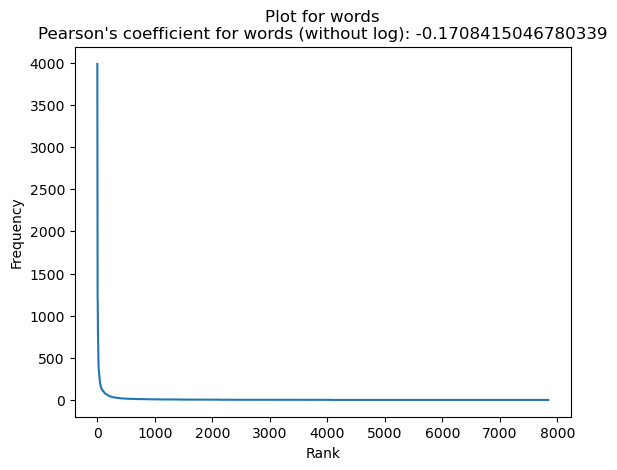

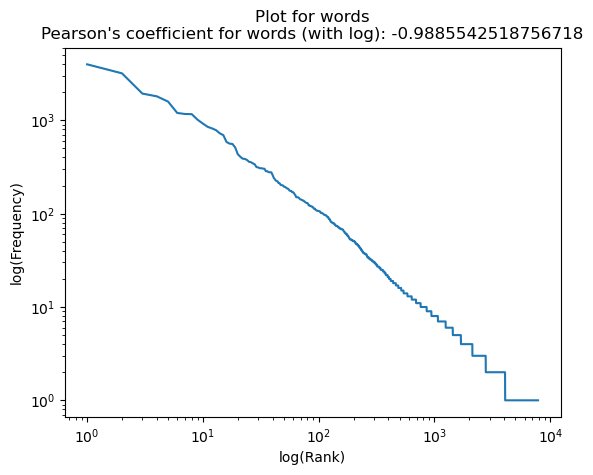

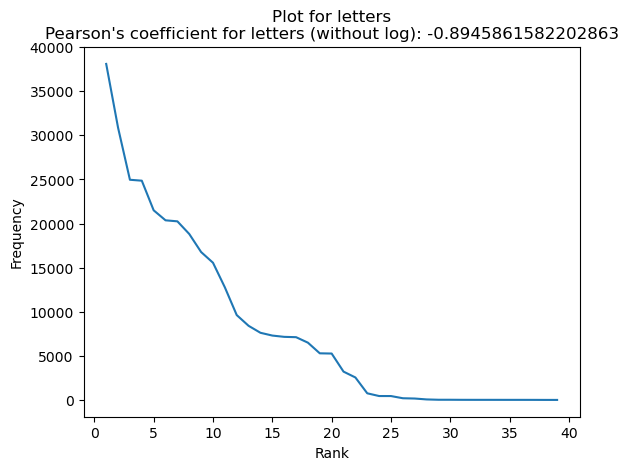

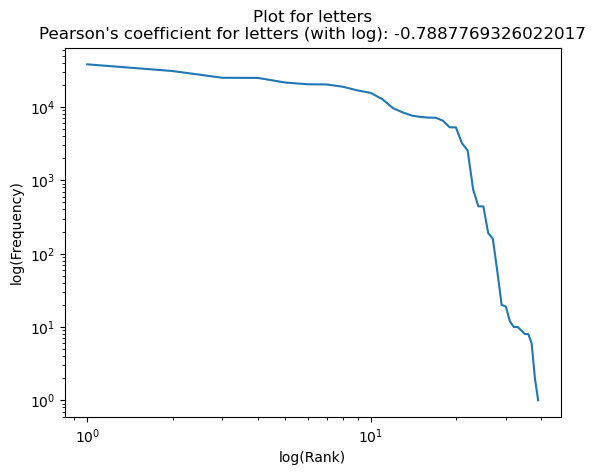

<Figure size 640x480 with 0 Axes>

In [19]:
text = text.lower()
words = re.findall(pattern, text)
# words = [x[0] if x[0] for x in words]
letters = re.findall(r'\w', text)

for i, s in enumerate((words, letters)):
    unsorted_ranked = Counter(s)
    ranked = unsorted_ranked.most_common()
    print(f"5 most common {'letters' if i else 'words'}: ", ranked[:5])
    with open(f"output/{'letters' if i else 'words'}_eng.txt", 'w') as f:
        for x in ranked:
            f.write(f"{x[0]}: {x[1]}\n")

    rank = np.arange(1, len(ranked)+1)
    frequency = [x[1] for x in ranked]
    plt.plot(rank, frequency)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    pearson = pearsonr(rank, frequency)
    plt.title(f"Plot for {'letters' if i else 'words'}\nPearson's coefficient for {'letters' if i else 'words'} (without log): {pearson[0]}")
    plt.figure()

    plt.plot(rank, frequency)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('log(Rank)')
    plt.ylabel('log(Frequency)')
    pearson_log = pearsonr(np.log(rank), np.log(frequency))
    plt.title(f"Plot for {'letters' if i else 'words'}\nPearson's coefficient for {'letters' if i else 'words'} (with log): {pearson_log[0]}")
    plt.figure()

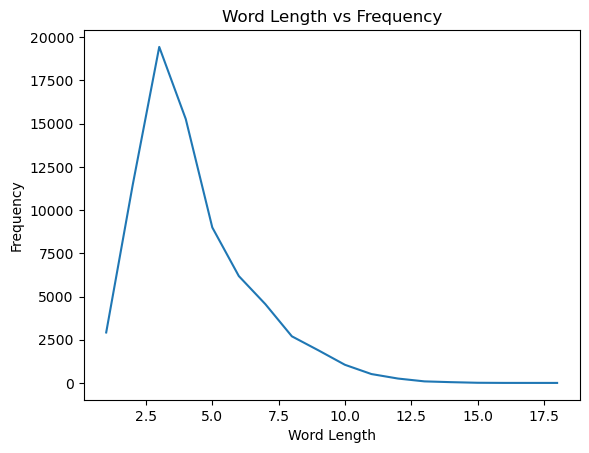

In [20]:
word_lengths = [len(word) for word in words]
length_freq = Counter(word_lengths)
lengths, freqs = zip(*sorted(length_freq.items()))
plt.plot(lengths, freqs)
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Word Length vs Frequency")
plt.show()

# Hindi

In [21]:
!wget --no-clobber https://raw.githubusercontent.com/cltk/hindi_text_ltrc/master/tulasidaas/Raamacharita_maanasa/1/main.txt
from indicnlp.tokenize import indic_tokenize

File ‘main.txt’ already there; not retrieving.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
with open('main.txt', 'r') as f:
    text = f.read()
    words = indic_tokenize.trivial_tokenize(text)
    words = [word for word in words if word[0] not in '॥।-?!']
    words = [word.strip('\n') for word in words]
    types = set(words)
    ttr = len(words) / len(types)
    print(ttr)

4.591298059539593


5 most common words:  [('न', 464), ('सब', 401), ('दो0', 295), ('राम', 259), ('सकल', 218)]
5 most common letters:  [('र', 10465), ('न', 9785), ('स', 8450), ('ह', 7633), ('त', 5724)]


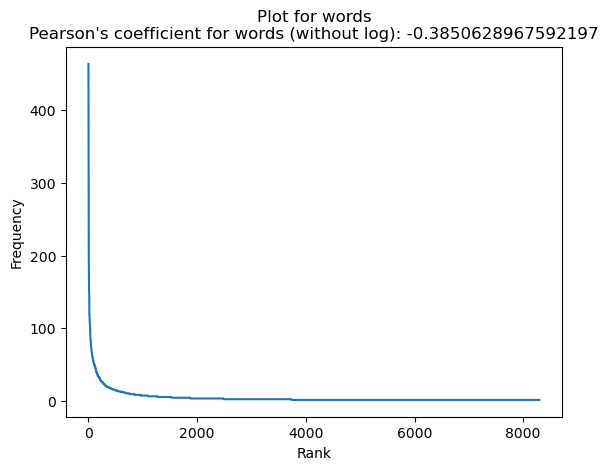

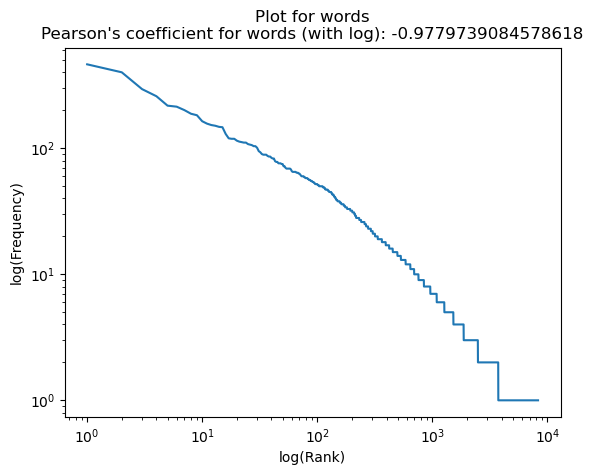

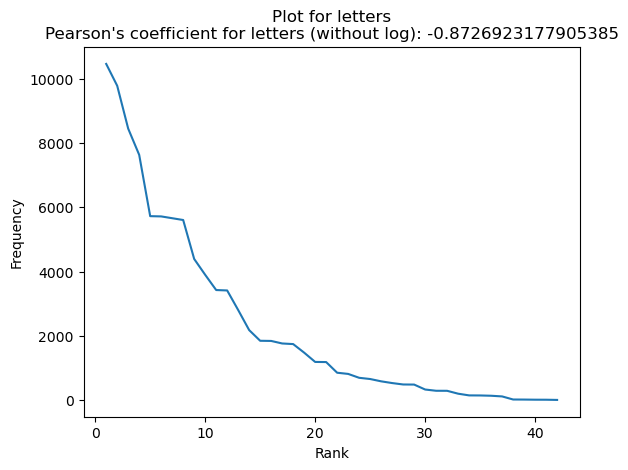

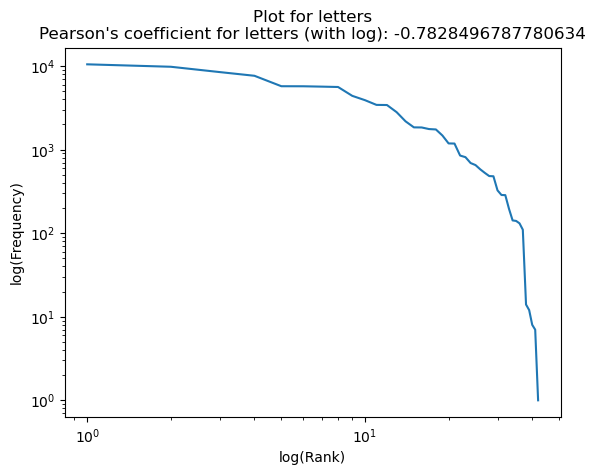

<Figure size 640x480 with 0 Axes>

In [33]:
letters = re.findall(r'[\u0904-\u0939\u0958-\u0961]', text)

for i, s in enumerate((words, letters)):
    unsorted_ranked = Counter(s)
    ranked = unsorted_ranked.most_common()
    print(f"5 most common {'letters' if i else 'words'}: ", ranked[:5])
    with open(f"output/{'letters' if i else 'words'}_hin.txt", 'w') as f:
        for x in ranked:
            f.write(f"{x[0]}: {x[1]}\n")

    rank = np.arange(1, len(ranked)+1)
    frequency = [x[1] for x in ranked]
    plt.plot(rank, frequency)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    pearson = pearsonr(rank, frequency)
    plt.title(f"Plot for {'letters' if i else 'words'}\nPearson's coefficient for {'letters' if i else 'words'} (without log): {pearson[0]}")
    plt.figure()

    plt.plot(rank, frequency)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('log(Rank)')
    plt.ylabel('log(Frequency)')
    pearson_log = pearsonr(np.log(rank), np.log(frequency))
    plt.title(f"Plot for {'letters' if i else 'words'}\nPearson's coefficient for {'letters' if i else 'words'} (with log): {pearson_log[0]}")
    plt.figure()

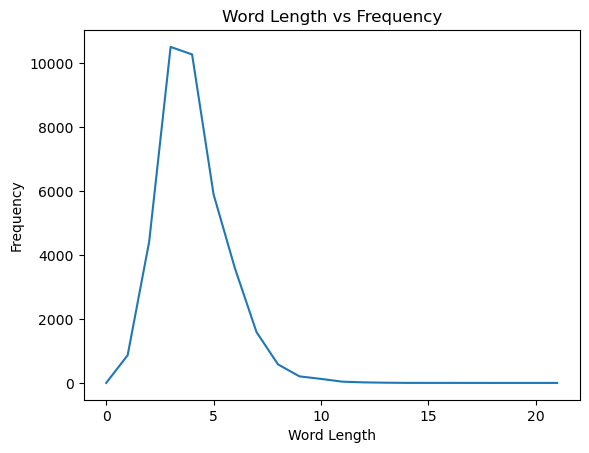

In [34]:
word_lengths = [len(word) for word in words]
length_freq = Counter(word_lengths)
lengths, freqs = zip(*sorted(length_freq.items()))
plt.plot(lengths, freqs)
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Word Length vs Frequency")
plt.show()